In [1]:
import os

In [2]:
os.getcwd()  # 현재 경로 확인하기


'D:\\ML'

In [3]:
new_path = os.path.join(os.getcwd(),'data')
new_path

'D:\\ML\\data'

In [4]:
import glob

In [6]:
# 해다 경로에 있는 모든 파일들의 리스트를 만드는 명령어
glob.glob(new_path+"/*")

['D:\\ML\\data\\Error Lot list.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.06.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.07.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.08.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.09.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.10.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.13.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.14.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.15.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.16.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.17.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.23.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.24.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.27.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.28.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.29.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.09.30.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.10.01.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.10.05.csv',
 'D:\\ML\\data\\kemp-abh-sensor-2021.10.06.csv',
 'D:\\ML\\data\\kemp-abh-sensor-

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# index 데이터 수집시 자동으로 부여되는 시퀀스한 값
# Process : process 추적을 위해 동일 process에 동일 숫자를 부여
# time : 측정 시 시간을 초 단위까지 기록
# Temp : 열풍건조 설비 내 공정 온도 측정 값
# Current :  열품겅조 설비 내 공저 전압 측정 값

sample = 'D:\\ML\\data\\kemp-abh-sensor-2021.09.06.csv'
df = pd.read_csv(sample, index_col=False)
df.head()

,Index,Process,Time,Temp,Current,Date
0,1,1,오후 4:24:03.0,75.139142,1.610,2021-09-06
1,2,1,오후 4:24:08.0,76.660421,1.530,2021-09-06
2,3,1,오후 4:24:13.0,77.177660,1.701,2021-09-06
3,4,1,오후 4:24:18.0,76.586434,1.736,2021-09-06
4,5,1,오후 4:24:23.0,77.877104,1.748,2021-09-06


In [14]:
# 0 : 에러가 발생한 작업단위의 날짜
# 1 ~ 11 : 에러가 발생한 공정의 번호
errorData = 'D:\\ML\\data\\Error Lot list.csv'
df = pd.read_csv(errorData, index_col=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2021-09-06,32.0,33.0,20.0,21.0,22.0,31.0,NaN,NaN,NaN,NaN,NaN
1,2021-09-07,32.0,33.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-09,15.0,16.0,17.0,21.0,22.0,23.0,29.0,30.0,31.0,NaN,NaN
4,2021-09-10,32.0,28.0,29.0,30.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
datalist = []
cnt = 0

for path in glob.glob(new_path+"/*")[1:]:  # 첫번째 csv를 제외한 데이터 목록
    origin = pd.read_csv(path, index_col=False)
    origin['Date']  = '-'.join( path.split('-')[-1].split('.')[:-1] )  # 날자를 추가
    cnt += len(origin)
    datalist.append(origin)

In [25]:
# 데이터 병합
# axis=0 이면 상하로 합치고  1이면 좌우로 합친다  ignore_index 기존 인덱스 유지여부
CatList =  pd.concat(datalist,axis=0, ignore_index=True)
CatList

,Index,Process,Time,Temp,Current,Date
0,1,1,오후 4:24:03.0,75.139142,1.610,2021-09-06
1,2,1,오후 4:24:08.0,76.660421,1.530,2021-09-06
2,3,1,오후 4:24:13.0,77.177660,1.701,2021-09-06
3,4,1,오후 4:24:18.0,76.586434,1.736,2021-09-06
4,5,1,오후 4:24:23.0,77.877104,1.748,2021-09-06
...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2021-10-27
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2021-10-27
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2021-10-27
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2021-10-27


In [26]:
# [단계 1] 데이터 조합 및 생성
# [단계 2] - 1 데이터 탐색  - 사본을 생성한다... 원본데이터의 훼손을 막기위해서
# df = CatList  두개가 같은 데이터.. 즉.. 한쪽이 변하면 다른쪽도 변경
df = CatList.copy()

In [27]:
# [단계 2] - 2  데이터 레이블링 확인
df.columns


Index(['Index', 'Process', 'Time', 'Temp', 'Current', 'Date'], dtype='object')

In [28]:
# [단계 2] - 3  데이터 유형 확인 - 각각의  속성 정보를 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51084 entries, 0 to 51083
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    51084 non-null  int64  
 1   Process  51084 non-null  int64  
 2   Time     51084 non-null  object 
 3   Temp     51084 non-null  float64
 4   Current  51084 non-null  float64
 5   Date     51084 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.3+ MB


In [33]:
# [단계 2] - 4 데이터 비율 확인
df = df[['Date','Process','Time','Temp','Current']]
df.isnull().sum() # 결측치의 개수
# 결측치의 비율
for col in df.columns:
    percent = df[col].isnull().sum() / df[col].shape[0]
    msg = 'col:{:>20}\t Percent of NaN value:{:.2f}%'.format(col,100*percent)
    print(msg)

col:                Date	 Percent of NaN value:0.00%
col:             Process	 Percent of NaN value:0.00%
col:                Time	 Percent of NaN value:0.00%
col:                Temp	 Percent of NaN value:0.00%
col:             Current	 Percent of NaN value:0.00%


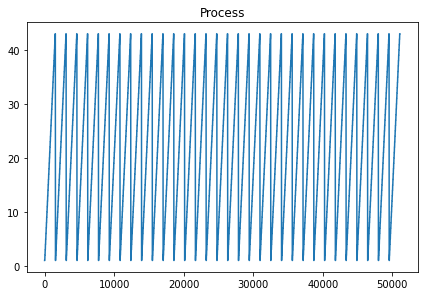

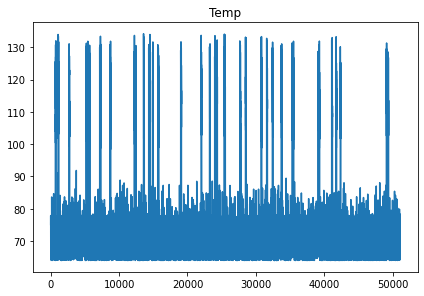

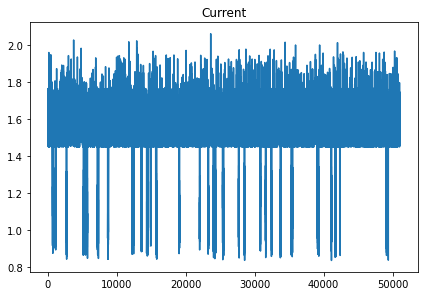

In [35]:
# [단계 2] - 5 데이터 분포 확인
for i in df.columns:
    try:
        df[i].plot()
        plt.tight_layout()
        plt.title(i)
        plt.show()
    except: pass

In [36]:
# [단계 2] - 6 데이터 간의 상관관계
# - 상관분석(Correlation analysis) 두 변수간의 관계를 확인하여 그 관계가 선형 적 혹은 비선형적
# 관계가 있는지를 확인하는 분석
df.columns

Index(['Date', 'Process', 'Time', 'Temp', 'Current'], dtype='object')

In [39]:
pick_data =  df[df.columns[3:]]
pick_data.head()

,Temp,Current
0,75.139142,1.610
1,76.660421,1.530
2,77.177660,1.701
3,76.586434,1.736
4,77.877104,1.748


In [40]:
pick_data.corr()

,Temp,Current
Temp,1.000000,-0.733613
Current,-0.733613,1.000000


In [42]:
!pip install seaborn

In [43]:
# 경고방지
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.style.use('ggplot')

<Figure size 1080x1080 with 0 Axes>

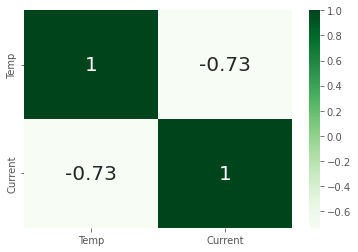

In [46]:
# 상관계수 시각화
import seaborn as sns
sns.heatmap(pick_data.corr(), annot=True, cmap='Greens', annot_kws={'size':20})
plt.show()

In [47]:
# 상관지수를 r 이라고 하면 
# r 값이 +-0.1이면 --> 없다고 할수 있음
# r 값이 +-0.1 ~ +- 0.3이면 --> 약한 양적 상관관계
# r 값이 +-0.3 ~ +- 0.7이면 --> 양적 상관관계
# r 값이 +-0.7 이상 --> 강한 양적 상관관계

In [49]:
# [단계 3] - 데이터 정제(전처리) 
df_er = pd.read_csv(glob.glob(new_path+"/*")[0],index_col=False)
df_er.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2021-09-06,32.0,33.0,20.0,21.0,22.0,31.0,NaN,NaN,NaN,NaN,NaN
1,2021-09-07,32.0,33.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-09,15.0,16.0,17.0,21.0,22.0,23.0,29.0,30.0,31.0,NaN,NaN
4,2021-09-10,32.0,28.0,29.0,30.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# 결측치 확인
# df_er.isnull().sum()
# df_er[df_er.isnull()]

In [61]:
df_er = df_er.transpose()
df_er

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN
6,31.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,17.0,26.0,NaN,NaN,NaN,NaN,31.0,NaN
7,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_er.columns = df_er.iloc[0,:]
df_er


0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN
6,31.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,17.0,26.0,NaN,NaN,NaN,NaN,31.0,NaN
7,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_er = df_er.iloc[1:,:]
df_er.head()

0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN


In [70]:
# [단계 3]  - 1 데이터 특성을 기반으로 결측치를 수정 혹은 제거
for col in df_er.columns:
    percent = df_er[col].isnull().sum() / df_er[col].shape[0]
    msg = f"column:\t{col}\tPercent of NaN value: {np.round( percent*100, 2)}"
    print(msg)

column:	2021-09-06	Percent of NaN value: 45.45
column:	2021-09-07	Percent of NaN value: 72.73
column:	2021-09-08	Percent of NaN value: 100.0
column:	2021-09-09	Percent of NaN value: 18.18
column:	2021-09-10	Percent of NaN value: 54.55
column:	2021-09-13	Percent of NaN value: 72.73
column:	2021-09-14	Percent of NaN value: 100.0
column:	2021-09-15	Percent of NaN value: 72.73
column:	2021-09-16	Percent of NaN value: 54.55
column:	2021-09-17	Percent of NaN value: 27.27
column:	2021-09-23	Percent of NaN value: 63.64
column:	2021-09-24	Percent of NaN value: 100.0
column:	2021-09-27	Percent of NaN value: 72.73
column:	2021-09-28	Percent of NaN value: 100.0
column:	2021-09-29	Percent of NaN value: 81.82
column:	2021-09-30	Percent of NaN value: 0.0
column:	2021-10-01	Percent of NaN value: 54.55
column:	2021-10-05	Percent of NaN value: 72.73
column:	2021-10-06	Percent of NaN value: 72.73
column:	2021-10-07	Percent of NaN value: 72.73
column:	2021-10-08	Percent of NaN value: 45.45
column:	2021-10

In [71]:
# 결측치를 처리할때 함부로 삭제하지 않는다
#1.  10% 미만인 경우 - 제거, 치환등 모든 방법이 가능
#2.  10% ~ 20% -> 과거 정보로 추정 혹은 예측, 대치
#3.  20% ~ 50% -> 예측아니 대치 방법을 사용
#4.  50% 이상 -> 컬럼(특성) 제거 혹은 데이터 재 수집

In [ ]:
# 1
# 2 : 평균과 중앙값 : 빠르게 처리가능하지만.. 값이 유사 혹은 같은 값을 가지기때문에 데이터 세트에 안좋음